In [1]:
# Base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from collections import Counter
from tqdm import tqdm
from statsmodels.stats import multitest

In [2]:
meta_dat = pd.read_csv('../P1/data/TCGA.LUAD.metadata.txt',sep = '\t')

In [3]:
meta_dat = meta_dat.dropna(subset=['DSS','DSS.time']).reset_index()

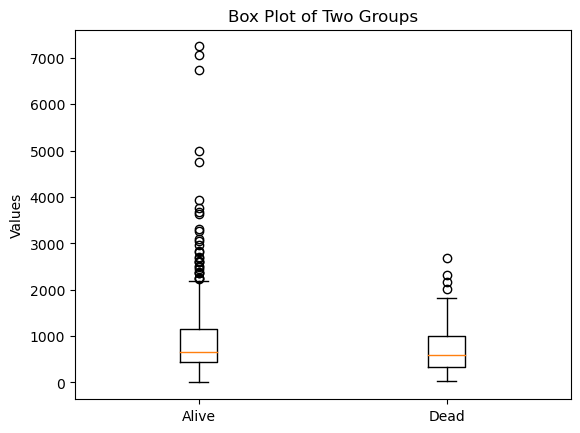

In [4]:
import matplotlib.pyplot as plt

group1 = meta_dat[meta_dat['DSS'] == 0]['DSS.time'].to_list()
group2 = meta_dat[meta_dat['DSS'] == 1]['DSS.time'].to_list()
fig, ax = plt.subplots()

# Create a box plot of the two groups
ax.boxplot([group1, group2])

# Set x-axis tick labels
ax.set_xticklabels(['Alive', 'Dead'])

# Set y-axis label
ax.set_ylabel('Values')

# Set title
ax.set_title('Box Plot of Two Groups')

# Display the plot
plt.show()

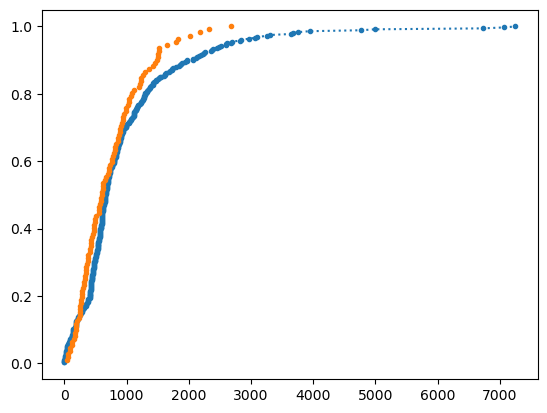

In [5]:
fig, ax = plt.subplots()
n = len(group1)

# Data sorted in ascending order
x = np.sort(group1)

# CDF values
y = np.arange(1, n+1) / n


# Plotting
ax.plot(x, y, marker='.', linestyle='dotted')

n = len(group2)

# Data sorted in ascending order
x = np.sort(group2)

# CDF values
y = np.arange(1, n+1) / n


# Plotting
ax.plot(x, y, marker='.', linestyle='none')


In [6]:
max_days = max(meta_dat['DSS.time'])
total_sample_list = []
bal_ratio_list = []
for day in range(int(np.floor(max_days))):
    num_negative_sample =sum((meta_dat['DSS']  == 1) & (meta_dat['DSS.time'] <= day))
    num_positive_sample =sum((meta_dat['DSS.time'] > day))
    total_sample = num_negative_sample + num_positive_sample
    bal_ratio = num_negative_sample / (num_negative_sample + num_positive_sample)
    total_sample_list.append(total_sample)
    bal_ratio_list.append(bal_ratio)

In [21]:
bal_ratio_list[int(365)]

0.07901234567901234

In [20]:
total_sample_list[int(365)]

405

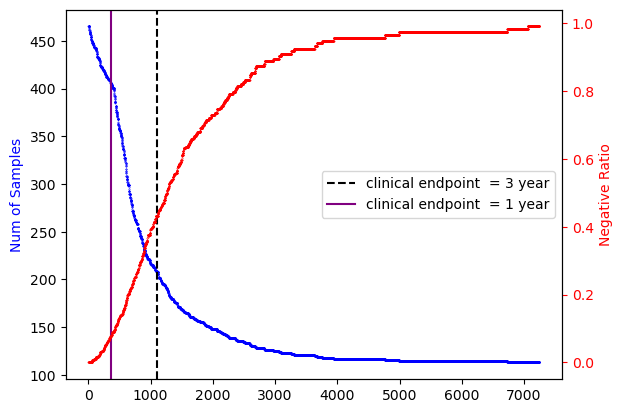

In [39]:
fig, ax1 = plt.subplots()
sc1 = ax1.scatter([*range(int(np.floor(max_days)))], total_sample_list,color = 'b',s = 0.1)
ax2 = ax1.twinx()
ax1.set_ylabel('Num of Samples', color='b')
# Scatter plot for y2 on ax2 (right y-axis)
sc2 = ax2.scatter([*range(int(np.floor(max_days)))], bal_ratio_list, color = 'r',s = 0.1)
ax2.set_ylabel('Negative Ratio', color='r')
ax2.tick_params('y', colors='r')
ax1.axvline(x=365*3, color='black', linestyle='--',label='clinical endpoint  = 3 year')
ax1.axvline(x=365, color='purple', linestyle='-',label='clinical endpoint  = 1 year')
ax1.legend(loc = 7)
plt.savefig('clinical_end_pt.png',dpi = 400)
plt.show()


In [27]:
def label_row(row,):
    if row['DSS'] == 1 and row['DSS.time'] < 365*3:
        return '0'
    elif row['DSS.time'] >= 365*3:
        return '1'    
    else:
        return None

In [28]:
meta_dat['Label'] = meta_dat.apply(label_row, axis=1)
meta_dat_clean = meta_dat[['patient_id', 'Label']]
meta_dat_clean = meta_dat_clean.dropna().reset_index(drop=True)
meta_dat_clean

,patient_id,Label
0,TCGA-05-4249,1
1,TCGA-05-4389,1
2,TCGA-05-4390,1
3,TCGA-05-4398,1
4,TCGA-05-4415,0
...,...,...
204,TCGA-MP-A5C7,1
205,TCGA-NJ-A4YF,1
206,TCGA-NJ-A4YG,1
207,TCGA-NJ-A4YQ,1


In [29]:
meta_dat_clean.to_csv('labels_3yr.csv')

In [30]:
Counter(meta_dat_clean['Label'])

Counter({'1': 119, '0': 90})